<a href="https://colab.research.google.com/github/seoxin4/colab/blob/main/smoteTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#======================================================================
#Project Name    : SMOTE to sklearn
#File Name       : smoteTest.ipynb
#Creation Date   : 2023/05/11
 
#Copyright © 2023 AokiShoei and Murata Kenta. All rights reserved.
 
#This source code or any portion thereof must not be  
#reproduced or used in any manner whatsoever.
#======================================================================

In [ ]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data_breast_cancer = load_breast_cancer()
data_x = pd.DataFrame(data_breast_cancer["data"], columns = data_breast_cancer["feature_names"])
data_y = pd.DataFrame(data_breast_cancer["target"], columns = ["Class"])

In [ ]:
data_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
# Standardization x
data_xs = data_x.apply(lambda i:(i - i.mean()) / i.std())
data_xs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [ ]:
# PCA
pca = PCA()
pca.fit(data_xs)
data_xf = pca.transform(data_xs)
data_xp = pd.DataFrame(data_xf, columns = ["V{}".format(x + 1) for x in range(len(data_xs.columns))]).iloc[:, :2]
data_breast_cancer_pca = pd.concat([data_y, data_xp.set_index(data_y.index)], axis = 1)
data_breast_cancer_pca

,Class,V1,V2
0,0,9.184755,1.946870
1,0,2.385703,-3.764859
2,0,5.728855,-1.074229
3,0,7.116691,10.266556
4,0,3.931842,-1.946359
...,...,...,...
564,0,6.433655,-3.573673
565,0,3.790048,-3.580897
566,0,1.255075,-1.900624
567,0,10.365673,1.670540


<Axes: xlabel='V1', ylabel='V2'>

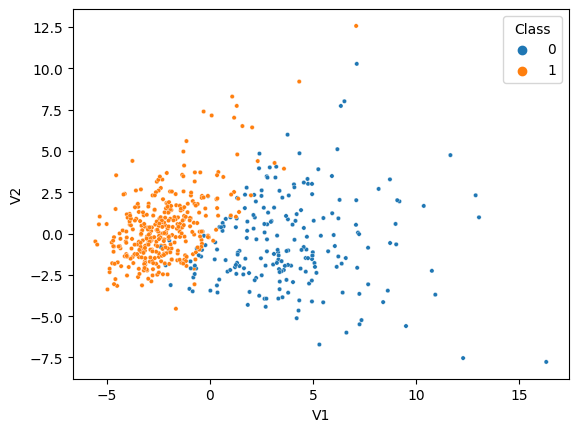

In [ ]:
# Drawing BreastCancer prosseced by PCA
sb.scatterplot(x = 'V1', y = 'V2', hue = 'Class', data = data_breast_cancer_pca, s = 10)

In [ ]:
# Make train
train_x, test_x, train_y, test_y = tts(data_xp, data_y, test_size = 0.2, random_state = 0)

In [ ]:
# Do over-sampling and drawing F-measure
def over_sampling(train_x, train_y, test_x, test_y, menu):
  sampling_strategy_value = 1

  if menu == "NONE":
    result_x = train_x
    result_y = train_y
  elif menu == "SMOTE":
    sm = SMOTE(random_state = 0, sampling_strategy = sampling_strategy_value)
    result_x, result_y = sm.fit_resample(train_x, train_y)
  elif menu == "ADASYN":
    ada = ADASYN(random_state = 0, sampling_strategy = sampling_strategy_value)
    result_x, result_y = ada.fit_resample(train_x, train_y)
  elif menu == "BSMOTE":
    blsm = BorderlineSMOTE(random_state = 0, sampling_strategy = sampling_strategy_value)
    result_x, result_y = blsm.fit_resample(train_x, train_y)
  else:
    print("\"", menu, "\" is not found.")
    return
  
  model = RandomForestClassifier(random_state = 0)
  model.fit(result_x, result_y)
  preds = model.predict(test_x)

  fig, (ax1, ax2) = plt.subplots(1, 2)

  print(f'Accuracy = {accuracy_score(test_y, preds)}')
  print(f'Precision = {precision_score(test_y, preds)}')
  print(f'Recall = {recall_score(test_y, preds)}')
  print(f'F1-measure  = {f1_score(test_y, preds)}')
  print("\n")
  cm = confusion_matrix(test_y, preds)
  plt.title('Confusion Matrix')
  sb.heatmap(cm, annot = True, fmt = "d", cmap = 'Blues', vmin = 0, vmax = 120, ax = ax2)

  result = pd.concat([result_x, result_y.set_index(result_x.index)], axis = 1)
  sb.scatterplot(x = 'V1', y = 'V2', hue = 'Class', data = result, s = 10, ax = ax1)
  print(result['Class'].value_counts())
  
  return

<ipython-input-35-c83751b5312d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(result_x, result_y)


Accuracy = 0.9210526315789473
Precision = 0.9393939393939394
Recall = 0.9253731343283582
F1-measure  = 0.9323308270676692


1    290
0    165
Name: Class, dtype: int64


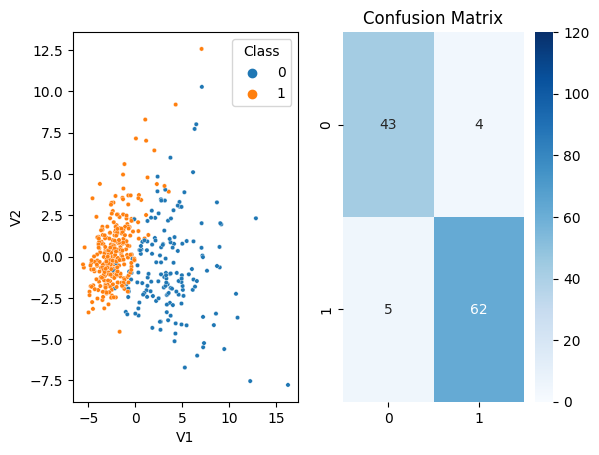

In [ ]:
# NATURE
over_sampling(train_x, train_y, test_x, test_y, "NONE")

<ipython-input-35-c83751b5312d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(result_x, result_y)


Accuracy = 0.9298245614035088
Precision = 0.9682539682539683
Recall = 0.9104477611940298
F1-measure  = 0.9384615384615386


1    290
0    290
Name: Class, dtype: int64


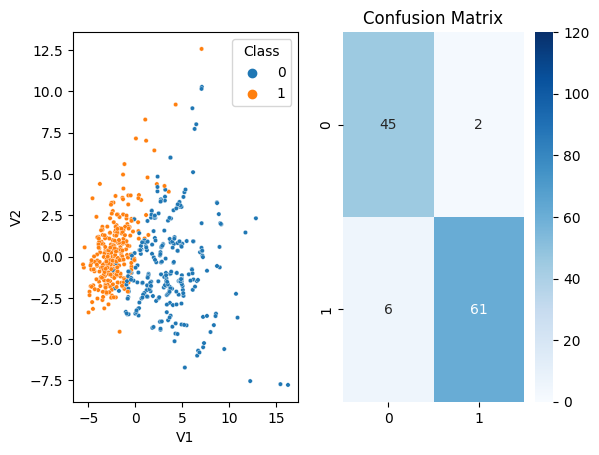

In [ ]:
# SMOTE
over_sampling(train_x, train_y, test_x, test_y, "SMOTE")

<ipython-input-35-c83751b5312d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(result_x, result_y)


Accuracy = 0.9122807017543859
Precision = 0.9830508474576272
Recall = 0.8656716417910447
F1-measure  = 0.9206349206349207


1    290
0    286
Name: Class, dtype: int64


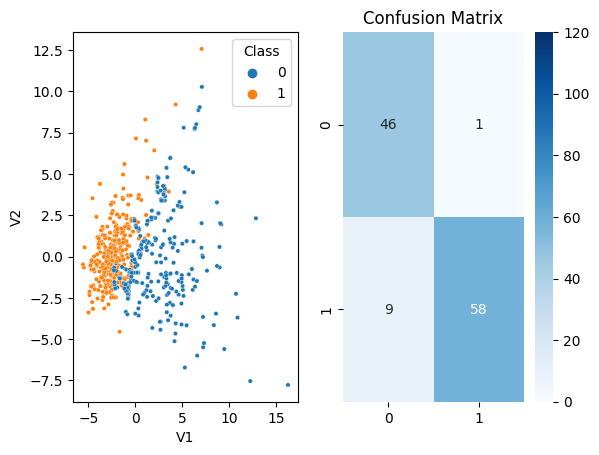

In [ ]:
# ADASYN
over_sampling(train_x, train_y, test_x, test_y, "ADASYN")

<ipython-input-35-c83751b5312d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(result_x, result_y)


Accuracy = 0.9298245614035088
Precision = 0.9836065573770492
Recall = 0.8955223880597015
F1-measure  = 0.9375


1    290
0    290
Name: Class, dtype: int64


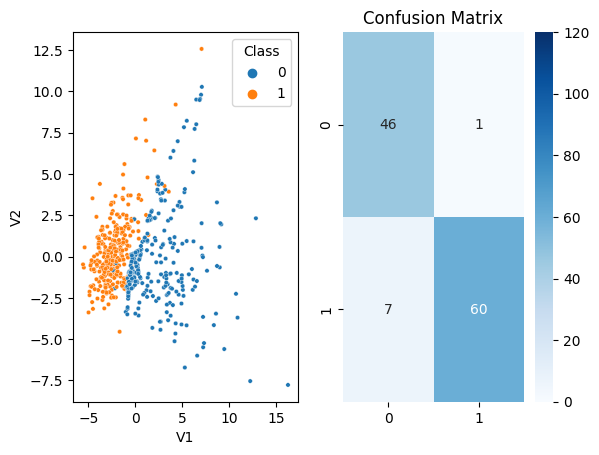

In [ ]:
# BSMOTE
over_sampling(train_x, train_y, test_x, test_y, "BSMOTE")